In [74]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [75]:



# Use read_excel for Excel files (.xlsx)
df = pd.read_csv('HousePricePrediction.xlsx - Sheet1.csv')
df.head()





,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
2,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
3,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
4,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0


In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
df.shape

(2920, 13)

In [78]:
df.head(10)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
2,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
3,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
4,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
5,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
6,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0,143000.0
7,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,1686.0,307000.0
8,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32.0,1107.0,200000.0
9,8,50,RM,6120,Inside,1Fam,5,1931,1950,BrkFace,0.0,952.0,129900.0


Data Preprocessing

In [79]:
df.drop_duplicates(inplace=True)

In [80]:
df.shape

(2919, 13)

In [81]:
df.head(5)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
2,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
3,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
4,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
5,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [82]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [83]:
df.drop(columns = ['Id'], inplace = True)

In [84]:
df.head(3)

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
2,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
3,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0


In [85]:
df.isna().sum()

,0
MSSubClass,0
MSZoning,4
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,1
BsmtFinSF2,1


In [86]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(df[['SalePrice']])

SimpleImputer()

In [87]:
imputer.statistics_

array([180921.19589041])

In [88]:
df['SalePrice'] = imputer.transform(df[['SalePrice']])

In [89]:
df =df.fillna(0)

In [90]:
df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.565262,1051.417266,180921.195890
std,42.517628,7886.996359,1.113131,30.291442,20.894344,169.179104,441.120498,56174.332503
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,163000.000000
50%,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.000000,180921.195890
75%,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,180921.195890
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
sns.set_style('darkgrid')

<Axes: ylabel='LotArea'>

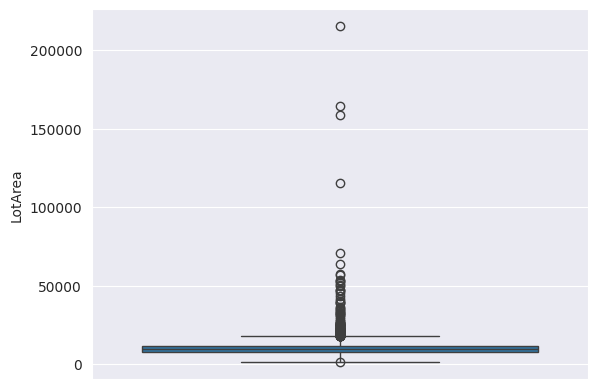

In [93]:
sns.boxplot(df, y = 'LotArea')

In [94]:
import numpy as np#quartile

Q1 = np.percentile(df['LotArea'], 25, interpolation = 'midpoint') #interquartile
Q3 = np.percentile(df['LotArea'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

In [95]:
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR

In [96]:
df = df[(df.LotArea < upperBound) & (df.LotArea > lowerBound)]

In [97]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.00000
2,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.00000
3,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.00000
4,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000
5,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1526,Inside,Twnhs,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2915,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589
2916,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2918,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,180921.19589


In [98]:
df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH', 0], dtype=object)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2791 entries, 0 to 2919
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2791 non-null   int64  
 1   MSZoning      2791 non-null   object 
 2   LotArea       2791 non-null   int64  
 3   LotConfig     2791 non-null   object 
 4   BldgType      2791 non-null   object 
 5   OverallCond   2791 non-null   int64  
 6   YearBuilt     2791 non-null   int64  
 7   YearRemodAdd  2791 non-null   int64  
 8   Exterior1st   2791 non-null   object 
 9   BsmtFinSF2    2791 non-null   float64
 10  TotalBsmtSF   2791 non-null   float64
 11  SalePrice     2791 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 283.5+ KB


In [100]:
cat_cols = df.select_dtypes('object').columns.tolist()

In [101]:
cat_cols

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [102]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

df.loc[:, cat_cols] = df[cat_cols].astype(str)

encoder.fit(df[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [103]:
encoded_data = encoder.transform(df[cat_cols])

In [104]:
encoded_df = encoder.get_feature_names_out(cat_cols)

In [105]:
encoded_df

array(['MSZoning_0', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing'], dtype=object)

In [106]:
df.drop(columns=cat_cols, inplace=True)

In [107]:
X = df.drop(columns = 'SalePrice')
y = df['SalePrice']

In [108]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X)

MinMaxScaler()

In [109]:
X[:] = scaler.transform(X)

In [110]:
X

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF
0,0.235294,0.430838,0.500,0.949275,0.883333,0.0,0.266999
2,0.000000,0.501821,0.875,0.753623,0.433333,0.0,0.393637
3,0.235294,0.603666,0.500,0.934783,0.866667,0.0,0.286962
4,0.294118,0.498735,0.500,0.311594,0.333333,0.0,0.235808
5,0.235294,0.789457,0.500,0.927536,0.833333,0.0,0.357143
...,...,...,...,...,...,...,...
2914,0.823529,0.003457,0.500,0.710145,0.333333,0.0,0.170306
2915,0.823529,0.028764,0.750,0.710145,0.333333,0.0,0.170306
2916,0.823529,0.026171,0.500,0.710145,0.333333,0.0,0.170306
2918,0.382353,0.553731,0.500,0.869565,0.700000,0.0,0.284467


In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2232, 7), (559, 7), (2232,), (559,))

In [113]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [114]:
y_pred = model.predict(X_test)

In [115]:
y_test[:5]

,SalePrice
2889,180921.19589
2365,180921.19589
2076,180921.19589
2565,180921.19589
2217,180921.19589


In [116]:
y_pred[:5]

array([120276.56367889, 200132.70846542, 147044.10393491, 128809.64106338,
       134581.92906544])

In [117]:
from sklearn.metrics import mean_absolute_error

In [118]:
mean_absolute_error(y_test, y_pred)

30778.94549814997

In [119]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=50, max_iter=100, tol = 0.1)

lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [120]:
lasso_pred = lasso_reg.predict(X_test)

In [121]:
mean_absolute_error(y_test, lasso_pred)

30708.65196714615

In [122]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=50, max_iter=100, tol = 0.1)

ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [123]:
ridge_pred = ridge_reg.predict(X_test)

In [124]:
mean_absolute_error(y_test, ridge_pred)

30005.572404991217